<a href="https://colab.research.google.com/github/varmatilak22/learning_tensorflow/blob/main/03_Introduction_to_Computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data.Such as the camera of a self-driving car recognizing the car in front.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbeckar/food-101

However we've modifided it to only use two classes(pizza 🍕 and steak 🍖) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note:** We start with a smaller dataset so we can experiment quickly that what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-07-09 18:43:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.7.59, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   143MB/s    in 0.7s    

2024-07-09 18:43:53 (143 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project.... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

#Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
#The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul  9 16:38 .
drwxr-xr-x 1 root root 4096 Jul  9 18:43 ..
drwxr-xr-x 4 root root 4096 Jul  9 16:38 test
drwxr-xr-x 4 root root 4096 Jul  9 16:38 train


In [ ]:
#Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualise our images,first let's get the class name programmatically.

In [ ]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
#Lets visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target directory (we'll view images from here)
  target_folder=target_dir+target_class

  #Get a random image Path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the images and plot it using matplotlib
  img=mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image Shape:{img.shape}") #Show the shape of the image

  return img

['3894222.jpg']
Image Shape:(512, 512, 3)


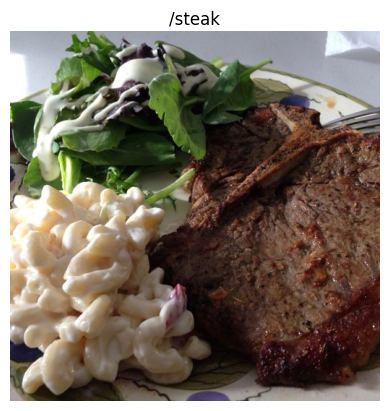

In [ ]:
# View a random images from the training dataset
img=view_random_image(target_dir='pizza_steak/train',
                      target_class='/steak')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[167, 174, 182],
        [167, 174, 182],
        [167, 174, 184],
        ...,
        [208, 219, 237],
        [211, 222, 240],
        [213, 224, 242]],

       [[167, 174, 182],
        [166, 173, 181],
        [166, 173, 183],
        ...,
        [204, 215, 233],
        [207, 218, 236],
        [209, 220, 238]],

       [[168, 175, 183],
        [167, 174, 182],
        [167, 174, 184],
        ...,
        [202, 213, 231],
        [205, 216, 234],
        [207, 218, 236]],

       ...,

       [[157, 152, 146],
        [160, 155, 149],
        [164, 156, 153],
        ...,
        [180, 174, 174],
        [180, 174, 174],
        [179, 173, 173]],

       [[155, 150, 144],
        [157, 152, 146],
        [161, 156, 152],
        ...,
        [179, 173, 173],
        [180, 174, 174],
        [180, 174, 174]],

       [[154, 149, 143],
        [157, 152, 146],
        [161, 156, 152],
        ...,
        [179, 173, 17

In [ ]:
#View the image shape
img.shape #returns width,height,colour channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.65490196, 0.68235294, 0.71372549],
        [0.65490196, 0.68235294, 0.71372549],
        [0.65490196, 0.68235294, 0.72156863],
        ...,
        [0.81568627, 0.85882353, 0.92941176],
        [0.82745098, 0.87058824, 0.94117647],
        [0.83529412, 0.87843137, 0.94901961]],

       [[0.65490196, 0.68235294, 0.71372549],
        [0.65098039, 0.67843137, 0.70980392],
        [0.65098039, 0.67843137, 0.71764706],
        ...,
        [0.8       , 0.84313725, 0.91372549],
        [0.81176471, 0.85490196, 0.9254902 ],
        [0.81960784, 0.8627451 , 0.93333333]],

       [[0.65882353, 0.68627451, 0.71764706],
        [0.65490196, 0.68235294, 0.71372549],
        [0.65490196, 0.68235294, 0.72156863],
        ...,
        [0.79215686, 0.83529412, 0.90588235],
        [0.80392157, 0.84705882, 0.91764706],
        [0.81176471, 0.85490196, 0.9254902 ]],

       ...,

       [[0.61568627, 0.59607843, 0.57254902],
        [0.62745098, 0.60784314, 0.58431373],
        [0.64313725, 0

In [ ]:
tf.__version__

'2.15.0'

## An End-to-End example

Lets build a convolutional Neural networks to find patterns in our images,more specifically we a need way to:
   * Load our images
   * Preprocess our images
   * Build a CNN to find patterns in our images
   * Compile our CNN
   * Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(1)

#Preprocess data(get all of the pixel values between 0 and 1,its also called scaling/normalisation)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=1)
valid_data=valid_datagen.flow_from_directory(directory=test_dir, #testing directory
                                             batch_size=32, #Batches of images
                                             target_size=(224,224), #Shape of image
                                             class_mode='binary', #Binary Classification
                                             seed=1) #Reproducibility

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD

model_1=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2,
              padding='valid'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')

])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

#fit the model
history_1=model_1.fit(train_data,
                      batch_size=32,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 149s 3s/step - loss: 0.5550 - accuracy: 0.7093 - val_loss: 0.3979 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 95s 2s/step - loss: 0.4310 - accuracy: 0.8067 - val_loss: 0.4109 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.3364 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.3584 - accuracy: 0.8467 - val_loss: 0.3207 - val_accuracy: 0.8960
Epoch 5/5
47/47 [==============================] - 110s 2s/step - loss: 0.3144 - accuracy: 0.8693 - val_loss: 0.2895 - val_accuracy: 0.8840


> **Note:** If the above is taking longer than ~10s per epoch,make sure you're using a GPU by going to `Runtime`->`Change Runtime`->`HardWare Acclerator`->`Tesla T4`
(you may have some rerun some cells above).

In [ ]:
500/32

15.625

In [ ]:

len(valid_data)

16

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

⚒ **Practice:** Go through the CNN Explainer website for a minimum of 10-minutes and compare our neural networks with thiers:[CNN_EXPLAINER](https://https://poloclub.github.io/cnn-explainer/)

### Using the same model before

Lets replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from Tensorflow Playground:[Tensorflow_Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.10489&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
#Set the random seed
tf.random.set_seed(1)

#Create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#Fit the model
model_2.fit(train_data,
            epochs=10,batch_size=32,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 170ms/step - loss: 0.8117 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 7s 139ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

In [ ]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 123ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931481957435608, 0.5]

In [ ]:
#Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1),model_2 perform terribly...
let's try to improve it

In [ ]:
#Set the random seed
tf.random.set_seed(1)

#Model_3
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#Fit the model
history_3=model_3.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 33s 681ms/step - loss: 2.3498 - accuracy: 0.6527 - val_loss: 3.9557 - val_accuracy: 0.5040
Epoch 2/10
47/47 [==============================] - 20s 423ms/step - loss: 1.3519 - accuracy: 0.6567 - val_loss: 2.1605 - val_accuracy: 0.5680
Epoch 3/10
47/47 [==============================] - 21s 455ms/step - loss: 0.7054 - accuracy: 0.7540 - val_loss: 0.7629 - val_accuracy: 0.6620
Epoch 4/10
47/47 [==============================] - 20s 422ms/step - loss: 0.4752 - accuracy: 0.7920 - val_loss: 0.4472 - val_accuracy: 0.7860
Epoch 5/10
47/47 [==============================] - 21s 454ms/step - loss: 0.4279 - accuracy: 0.8127 - val_loss: 0.9705 - val_accuracy: 0.5740
Epoch 6/10
47/47 [==============================] - 25s 534ms/step - loss: 0.7004 - accuracy: 0.7153 - val_loss: 0.6149 - val_accuracy: 0.7160
Epoch 7/10
47/47 [==============================] - 28s 584ms/step - loss: 0.4497 - accuracy: 0.8167 - val_loss: 0.4393 - val_accuracy: 0.8060

In [ ]:
#Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
15000000/35000 #nearly 500times faster than ANN

428.57142857142856

🔑 **Notes:**You can think that of trainable parameters as **patterns a model can learn from data**.Intuitively,you might think more is better.And in lots of cases,it is.But in this case,the difference here is the two different styles of model we're using.we here a series of dense layers has a number of different learnable parameters connected to each other and hence higher number of possible learnable patterns ** a convolutional neural networks seeks to sort out and learns the most important patterns in an image**.So even though these are less learnable parameters in our convolutional neural network,these are often more helpful in dechipering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

##Binary Classification:Lets break it down:
1. Become one with the data.
2. Preprocess the data (prepared it for our model,the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with the baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline model)
7. Repeat untill satisfy(Experiment,Experiment,Experiment)

### 1. Become One with the data

['3335013.jpg']
Image Shape:(512, 512, 3)
['1285298.jpg']
Image Shape:(341, 512, 3)


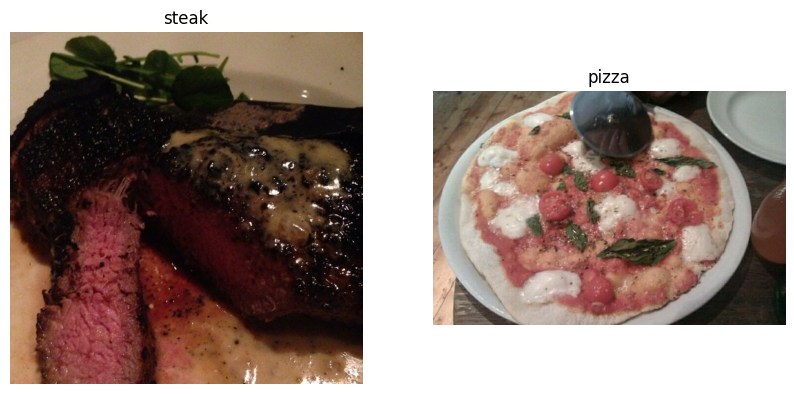

In [ ]:
#Visualise the data
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train/','pizza')
plt.show()

In [ ]:

'''
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
view_random_image('pizza_steak/train/','steak')
plt.subplot(2,2,2)
view_random_image('pizza_steak/train/','pizza')
plt.subplot(2,2,3)
view_random_image('pizza_steak/train/','steak')
plt.subplot(2,2,4)
view_random_image('pizza_steak/train/','pizza')
plt.show()
'''

"\nplt.figure(figsize=(6,6))\nplt.subplot(2,2,1)\nview_random_image('pizza_steak/train/','steak')\nplt.subplot(2,2,2)\nview_random_image('pizza_steak/train/','pizza')\nplt.subplot(2,2,3)\nview_random_image('pizza_steak/train/','steak')\nplt.subplot(2,2,4)\nview_random_image('pizza_steak/train/','pizza')\nplt.show()\n"

### 2.Preprocess the data(prepare it for the model)

In [ ]:
#Define the dir dataset paths
train_dir='pizza_steak/train/'
test_dir='pizza_steak/test/'

Our next step is to turn our data into **Batches**.

A Batch is a small subset of data.Rather than look at all ~10,000 images at one time, a model might only look at 32 a time.

It does this for couple for reasons:
1. 10000 images (ormore) might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result int the model not being able to learn very well.

Why 32?
Bcoz 32 is good for your health.


In [ ]:
#Create a train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
#Load in our images data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir, #Target dir of images
                                             target_size=(224,224), #Target size of images(height,width)
                                             class_mode='binary', #type of data you're working with
                                             batch_size=32) #size of the mini batches to load data into
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of train test batch
images,labels=train_data.next() #get the 'next' batch in images/labels in train_data
len(images),len(labels)

(32, 32)

In [ ]:
#How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#Get the first two images
images[:2],images[0].shape

(array([[[[0.05882353, 0.01960784, 0.02352941],
          [0.05490196, 0.01568628, 0.01960784],
          [0.0509804 , 0.01176471, 0.01568628],
          ...,
          [0.00784314, 0.01176471, 0.01960784],
          [0.00784314, 0.01176471, 0.02745098],
          [0.01176471, 0.01568628, 0.03137255]],
 
         [[0.06666667, 0.03137255, 0.03529412],
          [0.0627451 , 0.02745098, 0.03137255],
          [0.0509804 , 0.01568628, 0.01960784],
          ...,
          [0.00392157, 0.00784314, 0.01568628],
          [0.00392157, 0.00784314, 0.01568628],
          [0.00784314, 0.01176471, 0.02745098]],
 
         [[0.04705883, 0.03137255, 0.02745098],
          [0.04705883, 0.03137255, 0.02745098],
          [0.03921569, 0.02352941, 0.01960784],
          ...,
          [0.01176471, 0.01568628, 0.02352941],
          [0.01176471, 0.01568628, 0.02352941],
          [0.01176471, 0.01568628, 0.02352941]],
 
         ...,
 
         [[0.47058827, 0.27058825, 0.08627451],
          [0.49019

In [ ]:
#View the first batch labels
labels,

(array([0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.],
       dtype=float32),)

### 3. Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting,you try to beat the baseline.

> 🔑**Note:** In deep learning ,there is almost infinite amt of architectures u could create. SO one of the best ways to get started is to start with something simple and see if it works on your data then introduce complexity as required (e.g.look at which current model is performing best in the field for your problem).

In [ ]:
#Make the creating of our model a little easier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
#Create the model(baseline,a layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10, #filters is the number of sliding windows going across an input (higher=more complex models)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, #the size of the step the sliding window  takes across an input
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), #Input layer (specify input shape)
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid') #output layer (working with binary classification so only 1 output neuron)
])

⚒ **Practice:** Understand what's going on in a Conv2D layer by going through the CNN Explainer website for 10-20 minutes:
https://poloclub.github.io/cnn-explainer/

In [ ]:
#Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
#Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.Fit the model

In [ ]:
#Check the lengths of training and testing data generator
len(train_data),len(test_data)

(47, 16)

In [ ]:
#Fit the model
history_4=model_4.fit(train_data, #This is a combination of labels and
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 166s 4s/step - loss: 0.7902 - accuracy: 0.7060 - val_loss: 0.4236 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 164s 3s/step - loss: 0.4290 - accuracy: 0.8087 - val_loss: 0.4176 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 113s 2s/step - loss: 0.3111 - accuracy: 0.8840 - val_loss: 0.3771 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 128s 3s/step - loss: 0.1807 - accuracy: 0.9360 - val_loss: 0.4532 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 138s 3s/step - loss: 0.0854 - accuracy: 0.9740 - val_loss: 0.5899 - val_accuracy: 0.7840


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 13s 792ms/step - loss: 0.2895 - accuracy: 0.8840


[0.2894980311393738, 0.8840000033378601]

### 5.Evaluate the model
It looks like a our model is learning something,lets evaluate it.

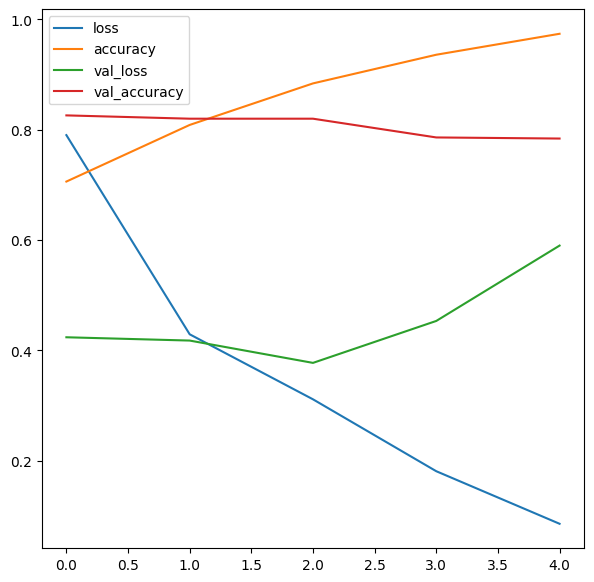

In [ ]:
import pandas as pd
#Lets plot the training curves
pd.DataFrame(history_4.history).plot(figsize=(7,7));

In [ ]:
#Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss'])) #how many epochs did we run for?

  #Plotloss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()

  #Plot the accuracy
  plt.plot(epochs,accuracy,label='Training Accuracy')
  plt.plot(epochs,val_accuracy,label='Validation Accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()

> 🔑 **Notes:** When a models **validation loss** starts to **increase**, its likely that the model is **overfitting** the training data `too well` and thus the models ability to generalize to unseen data wil be diminished.

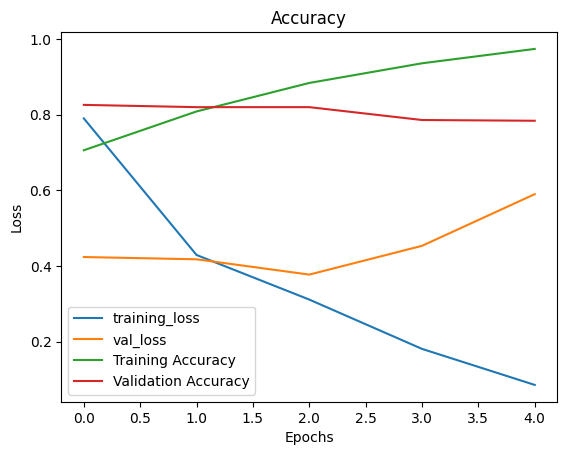

In [ ]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6.Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting:
  * Increase the number of Conv2D layers
  * Increase the number of conv filters
  * Add another dense layer to the output of our flattened layer

Reduces overfitting:
* Add data augmentation
* Add Regularisation (such as MaxPool2D)
* Add more data...

> 🔑 **Notes:** Reducing overfitting is also known as Regularisation

In [ ]:
#Create the model (this is going to be our new baseline)
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
#Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_5=model_5.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.5960 - accuracy: 0.6667 - val_loss: 0.5261 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 80s 2s/step - loss: 0.4644 - accuracy: 0.7913 - val_loss: 0.3852 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4078 - accuracy: 0.8180 - val_loss: 0.3351 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 48s 1s/step - loss: 0.3924 - accuracy: 0.8333 - val_loss: 0.3466 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 52s 1s/step - loss: 0.3650 - accuracy: 0.8413 - val_loss: 0.3465 - val_accuracy: 0.8540


In [ ]:
#Get a summary of our model with max Pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


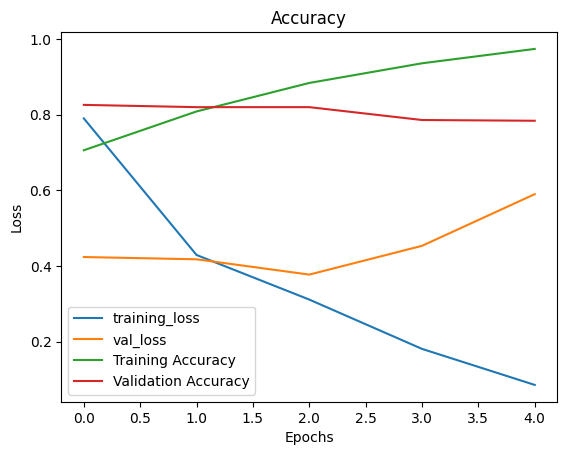

In [ ]:
#Plot the loss curves
plot_loss_curves(history_4)

### Opening our bag of tricks and finding data augmentation

In [ ]:
#Create the ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True,
                                           )
#Create a train image generator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255)

#Create a image datagenerator for testing instance with data augmentation
test_datagen_augmented=ImageDataGenerator(rescale=1/255,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True)

#Create a testdatagen for testing data without data augmentation
test_datagen=ImageDataGenerator(rescale=1/255)

> 🤔 **Notes:** What is data augmentation?

Ans. Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.Altering might mean adjusting the rotation of an image,flipping it,cropping it or something similar.

Lets write some code to visualise the data augmentation

In [ ]:
#import data augmented it from training dir
print("Augmented Train Data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False) #For demonstrating purposes only
print("Non-Augmented Train Data:")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)
IMG_SIZE=(224,224)
#Testing augmented
print("Augmented Testing Data:")
test_data_augmented=test_datagen_augmented.flow_from_directory(test_dir,
                                                               target_size=IMG_SIZE,
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               shuffle=False)
print("Non-Augmented Testing Data:")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode='binary',
                                           shuffle=False)


Augmented Train Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Train Data:
Found 1500 images belonging to 2 classes.
Augmented Testing Data:
Found 500 images belonging to 2 classes.
Non-Augmented Testing Data:
Found 500 images belonging to 2 classes.


> **Note:** Data Augmentation is usually only performed on the training data. Using `ImageDataGenerator` building data augmentation parameters our images are left as they are in the directories but are modified as the're loaded into the model.

Finally lets visualise the augmented data.!!!

In [ ]:
#Get the sample augmented data batches
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()
#note: Only images are augmented not labels


Showing Image Number: 13


(-0.5, 223.5, 223.5, -0.5)

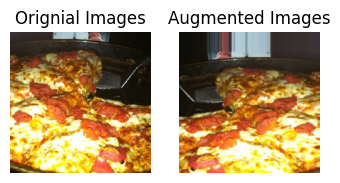

In [ ]:
#Show orignial images and augmented images
import random
random_number=random.randint(0,32) #Our batch sizes is 32

print("Showing Image Number:",random_number)
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title("Orignial Images")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Images")
plt.axis('off')

Now we have seen that how images are converted to augmented images. Lets build a model and see how our model learns on augmented data.

In [ ]:
tf.random.set_seed(1)
#Create a model (same as model_5)
model_6=Sequential([
    Conv2D(10,2,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

#Compile a model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

#Fit a model
history_6=model_6.fit(train_data_augmented, #fitting model 6 on augmented training data
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 55s 1s/step - loss: 0.7384 - accuracy: 0.4733 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.6939 - accuracy: 0.5287 - val_loss: 0.6597 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.6928 - accuracy: 0.5393 - val_loss: 0.6706 - val_accuracy: 0.5360
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.6660 - accuracy: 0.5860 - val_loss: 0.6070 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 54s 1s/step - loss: 0.6568 - accuracy: 0.6300 - val_loss: 0.5613 - val_accuracy: 0.8080


In [ ]:
model_6.evaluate(test_data)

16/16 [==============================] - 5s 276ms/step - loss: 0.5613 - accuracy: 0.8080


[0.5613240003585815, 0.8080000281333923]

In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 7s 423ms/step - loss: 0.3465 - accuracy: 0.8540


[0.3465440273284912, 0.8539999723434448]

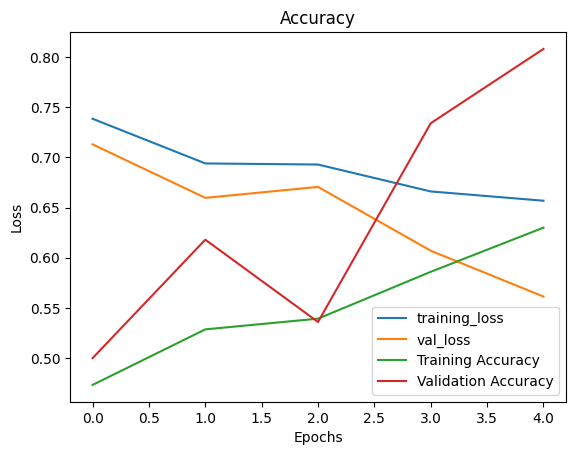

In [ ]:
#Check our model training and testing curves
plot_loss_curves(history_6)

Lets shuffle our train data augmented and test data augmented a built a model on that.

In [ ]:
#Train data AUgmented Shuffle
print("Augmented Shuffle Training Data:")
train_data_augmented_shuffle=train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         class_mode='binary',
                                                                         batch_size=32,
                                                                         shuffle=True)

print("Augmented Shuffle Testing Data:")
test_data_augmented_shuffle=test_datagen_augmented.flow_from_directory(test_dir,
                                                                       target_size=IMG_SIZE,
                                                                       class_mode='binary',
                                                                       batch_size=32,
                                                                       shuffle=True)


Augmented Shuffle Training Data:
Found 1500 images belonging to 2 classes.
Augmented Shuffle Testing Data:
Found 500 images belonging to 2 classes.


In [ ]:
#Create a model with augmented shuffle (same as model 5 and model_6)
model_7=Sequential([
    Conv2D(10,2,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(),
    Conv2D(10,2,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

#COmpile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit the model
history_7=model_7.fit(train_data_augmented_shuffle,#We are fitting on augmented and shuffled data
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffle),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 55s 1s/step - loss: 0.6569 - accuracy: 0.6193 - val_loss: 0.5354 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 78s 2s/step - loss: 0.5709 - accuracy: 0.7167 - val_loss: 0.4582 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 60s 1s/step - loss: 0.5307 - accuracy: 0.7393 - val_loss: 0.3904 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.5108 - accuracy: 0.7667 - val_loss: 0.4039 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.4839 - accuracy: 0.7733 - val_loss: 0.3457 - val_accuracy: 0.8600


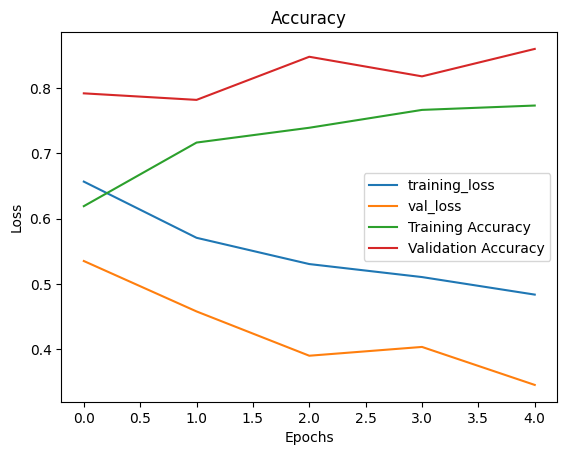

In [ ]:
#Lets plot the loss curves
plot_loss_curves(history_7)

In [ ]:
def curves_plot(history,name):
  plt.figure(figsize=(15,5))
  plt.suptitle(name)
  plt.subplot(1,2,1)
  plt.title('Loss')
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')

  plt.subplot(1,2,2)
  plt.title("Accuracy")
  plt.plot(history.history['accuracy'],label='Accuracy')
  plt.plot(history.history['val_accuracy'],label='Val_accuracy')
  plt.legend()

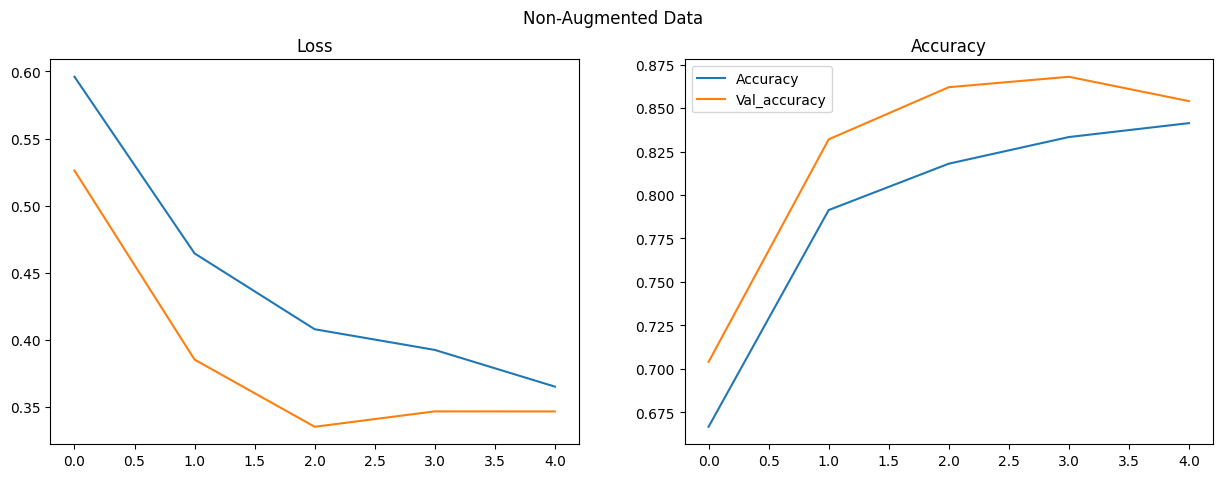

In [ ]:
curves_plot(history=history_5,name='Non-Augmented Data')

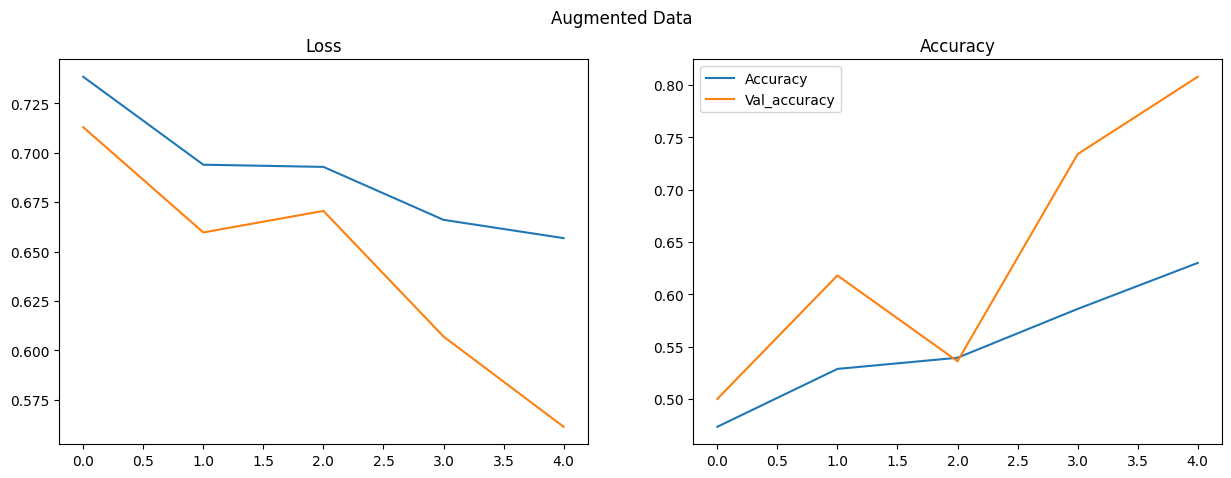

In [ ]:
curves_plot(history_6,'Augmented Data')

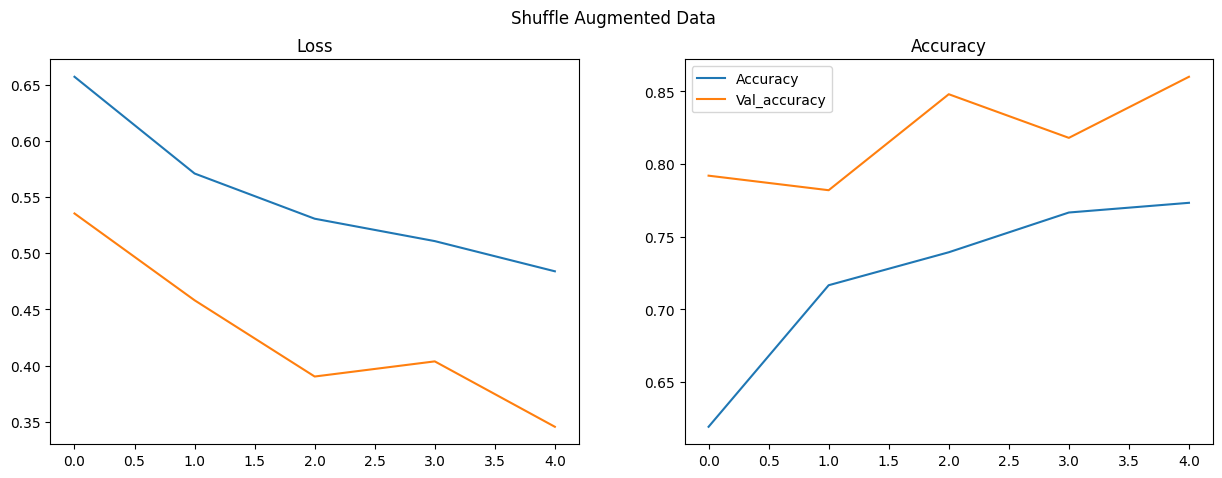

In [ ]:
curves_plot(history_7,'Shuffle Augmented Data')

> 🔑**Notes** When shuffling training data, the model gets exposed to all different kinds of data training, thus enabling it to learn features across a wide array of images (in our cases ,pizzas and steak at the same time instead of just pizza then steak)

### 7. Repeat until Satisfied

Since we've already beaten our baseline, there are few things we could try to continue to improve our model:
  * Increase the number of model layers (e.g. Add more `Conv2D`,`MaxPool2D`layers)
  * Increase the number of filters in each convolutional layer(e.g. from 10 to 32 or even 64)
  * Train for longer (more epochs)
  * Find an ideal learning rate
  * Get more data (give our model more opportnunites to learn)
  * Use **transfer learning** to leverage what another image model has learned and adjust if for our own use case.

  > ⚒**Practice:** Recreate the model on CNN explainer website (same as `model_1`) and see how it performed on the `Augmented-Shuffled` training data.

### Practice: Re-Create the model on CNN Explainer website

In [ ]:
#Create the model_8(same as model_1) CNN Explainer website
# Sequential - Use for rapid prototyping
model_8=Sequential([ #You can add layers in a sequential manner,which makes the model easy to read and understand
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)), #the image size should be same as given in target-size in imagegenerator
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

#Compile a model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
#Fit the model
history_8=model_8.fit(train_data_augmented_shuffle,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffle),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 113s 2s/step - loss: 0.6994 - accuracy: 0.5587 - val_loss: 0.5582 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 134s 3s/step - loss: 0.5654 - accuracy: 0.7093 - val_loss: 0.3977 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 117s 2s/step - loss: 0.5356 - accuracy: 0.7307 - val_loss: 0.4355 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.4878 - accuracy: 0.7740 - val_loss: 0.3692 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 143s 3s/step - loss: 0.4920 - accuracy: 0.7633 - val_loss: 0.3881 - val_accuracy: 0.8540


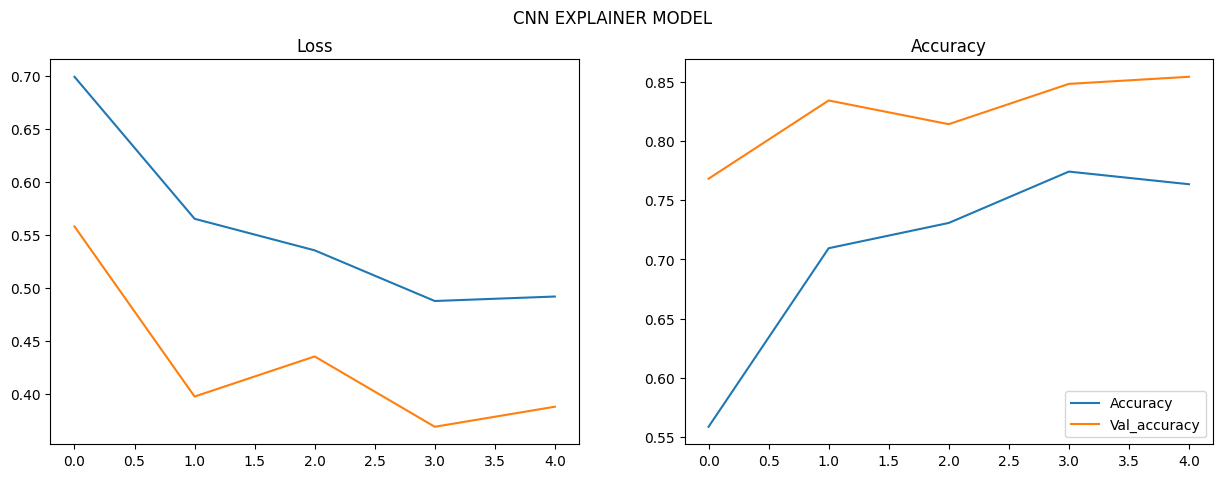

In [ ]:
curves_plot(history_8,"CNN EXPLAINER MODEL")

### Making a prediction with our trained model on our own custom data

In [ ]:
#classes we working with
print(class_names)

['pizza' 'steak']


In [ ]:
#view a sample image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-07-09 19:39:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2024-07-09 19:39:56 (19.4 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

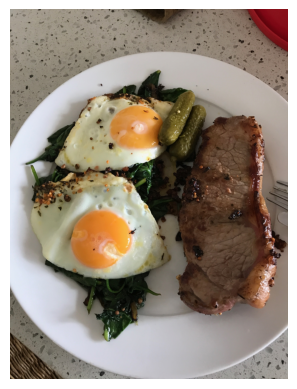

In [ ]:
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')

In [ ]:
#shape of image
steak.shape

(4032, 3024, 3)

> 🔑**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, its important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

#### load_and_prep_image Function

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

#Create a function to import and image and resize it to be able to used with our model
def  load_and_prep_image(image_path):
  """
  Reads an image from filename ,turns into tensor and reshapes
  into (img_shape,img_shape,color_channels)
  """
  #Read in the image
  img=tf.io.read_file(filename)
  #Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize the image
  img=tf.image.resize(img,[img_shape,img_shape])
  #Normalise the image
  img=img/255.
  return img

In [ ]:
#Load in and progress our custom image
steak_1=load_and_prep_image('/content/03-steak.jpeg')
steak_1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
tf.expand_dims(steak_1,axis=0)

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
model_7.predict(tf.expand_dims(steak_1,axis=0))

1/1 [==============================] - 0s 172ms/step


array([[0.80895907]], dtype=float32)

> `array([[0.8933751]], dtype=float32)` - Prediction Probability (nearer to 1 =1 and nearer to 0=0))

Looks like our custom images is being put through the model, however it currently outputs a prediction probability, wouldn't it be nice if we could visualise the image as well as the model's prediction?

In [ ]:
#That would be Nice?
#Remind ourselves our class_names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
predict_class_value=np.round(model_7.predict(tf.expand_dims(steak_1,axis=0))[0][0])

1/1 [==============================] - 0s 30ms/step


In [ ]:
#We can index the prediction class by rounding prediction probability and indexing it on class names
pred_class=class_names[int(predict_class_value)]
print(pred_class)

steak


#### `pred_and_plot` function

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename,makes a prediction with model
  and plots the image with the predicted class label as the title.
  """
  #import the target image and preprocess it
  img=load_and_prep_image(filename)
  #Make a prediction
  predict_int=model.predict(tf.expand_dims(img,axis=0))
  #Get the predicted class
  predict_class=class_names[int(tf.round(predict_int))]

  print("Custom Image:")
  #Plot the Custom image
  plt.figure()
  plt.title(f"Predicted Class:{predict_class}")
  plt.imshow(img)
  plt.axis('off')
  plt.show()


1/1 [==============================] - 0s 28ms/step
Custom Image:


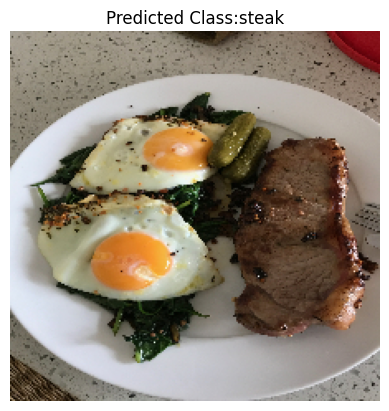

In [ ]:
#Test our model on custom image
pred_and_plot(model_7,'03-steak.jpeg')

Our Model works! Lets try it on another image... This time pizza🍕

--2024-07-09 19:40:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2024-07-09 19:40:01 (25.1 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 30ms/step
Custom Image:


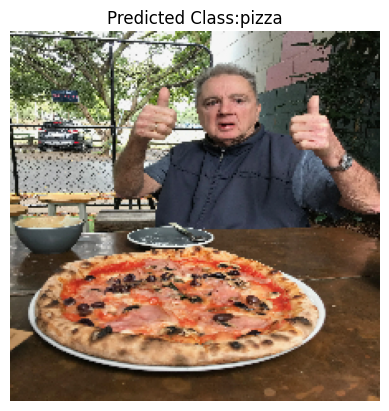

In [ ]:
#Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,'03-pizza-dad.jpeg')

# Multi-Class Image Classification

We just been through the bunch of the following steps with a binary classification Problem (Pizza Vs Steak),now  we're going to step things up a notch with 10 classes of food categories (BINARY CLASSIFICATION) :
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (Overfit the data make sure it works)
5. Evaluation the model
6. Adjust the different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat untill satisfied!!!!

## 1. Become one with the Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-07-09 19:40:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.251, 172.217.164.27, 172.217.0.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  61.5MB/s    in 7.0s    

2024-07-09 19:40:09 (70.3 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
#Unzip our data
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [ ]:
!ls -ls 10_food_classes_all_data

total 8
4 drwxr-xr-x 12 root root 4096 Jul  9 17:27 test
4 drwxr-xr-x 12 root root 4096 Jul  9 17:27 train


In [ ]:
#Setup the train and test directories
train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [ ]:
#Lets get the class name
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(f"Class_names:{class_names}")

Class_names:['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['723306.jpg']
Image Shape:(382, 512, 3)


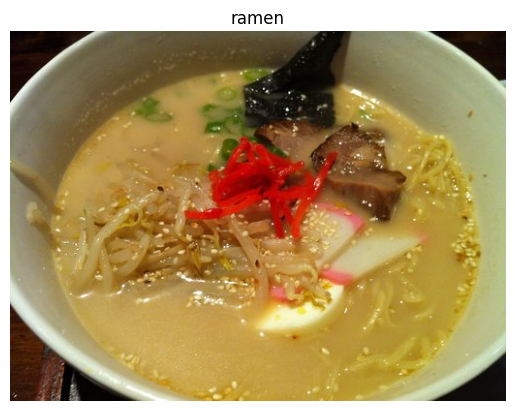

In [ ]:
#Visualise,Visualise,Visualise
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

In [ ]:
#Get path of Image
train_folder=train_dir+class_names[0]
train_folder

'10_food_classes_all_data/train/chicken_curry'

In [ ]:
def view_random_sample(target_folder,target_class):
  #Get the target folder
  target_path=target_folder+target_class
  print(f"Target_Class_Path:{target_path}")

  #Absolute path
  path=target_path+'/'+random.sample(os.listdir(target_path),1)[0]

  #Plot the image
  img=mpimg.imread(path)
  plt.title(f"Class:{target_class}")
  plt.imshow(img)
  plt.axis('off')

array([[[171, 161, 149],
        [180, 170, 158],
        [174, 164, 152],
        ...,
        [169, 151, 139],
        [169, 151, 139],
        [169, 151, 139]],

       [[175, 165, 153],
        [183, 173, 161],
        [176, 166, 154],
        ...,
        [169, 151, 139],
        [169, 151, 139],
        [169, 151, 139]],

       [[179, 169, 159],
        [186, 176, 166],
        [178, 168, 156],
        ...,
        [170, 152, 138],
        [171, 153, 141],
        [171, 153, 141]],

       ...,

       [[220, 194, 179],
        [220, 194, 179],
        [217, 194, 178],
        ...,
        [253, 252, 232],
        [254, 253, 233],
        [254, 253, 233]],

       [[222, 196, 181],
        [221, 195, 180],
        [220, 194, 177],
        ...,
        [253, 252, 231],
        [253, 252, 231],
        [253, 252, 231]],

       [[225, 199, 184],
        [224, 198, 183],
        [223, 197, 180],
        ...,
        [253, 252, 231],
        [253, 252, 231],
        [253, 252, 231]]], dtype=uint8)
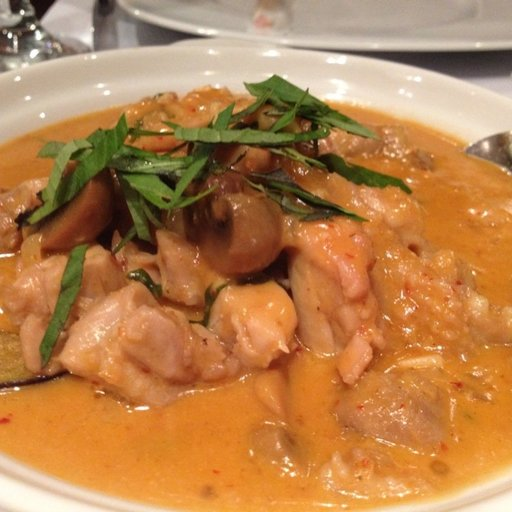

In [ ]:
mpimg.imread(train_folder+"/"+random.sample(os.listdir(train_folder),1)[0])

Target_Class_Path:10_food_classes_all_data/train/pizza


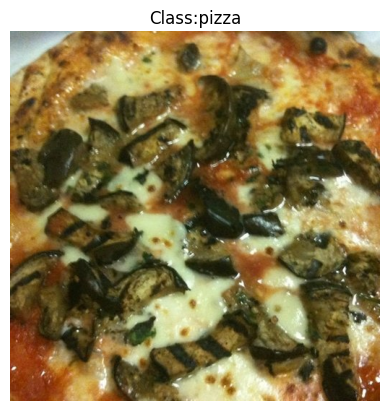

In [ ]:
view_random_sample(target_folder='10_food_classes_all_data/train/',target_class='pizza')

### 2. Preprocess the data(prepare it for a model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Rescale the image
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

#Load the data from the dir
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32,
                                             shuffle=False)

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size=32,
                                           shuffle=False)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###3. Create a model (start with the baseline)
We been talking a lot about CNN explainer website...
how about we just take there model (also on 10 classes) ad use it for a problem..?

In [ ]:
#For multi class classification excat replica of model (CNN Explainer website)
model_9=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax') #Changed to have 10 output neurons and use the softmax activation for multi-class classification
])

#Compile a model
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [ ]:
len(test_data)

(79, '10_food_classes_all_data/test/')

In [ ]:
#Fit the model
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=round(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 450s 2s/step - loss: 2.3394 - accuracy: 0.0699 - val_loss: 2.3077 - val_accuracy: 0.0000e+00
Epoch 2/5
235/235 [==============================] - 516s 2s/step - loss: 2.3038 - accuracy: 0.0732 - val_loss: 2.3064 - val_accuracy: 0.0000e+00
Epoch 3/5
235/235 [==============================] - 565s 2s/step - loss: 2.3053 - accuracy: 0.0908 - val_loss: 2.3055 - val_accuracy: 0.0000e+00
Epoch 4/5
235/235 [==============================] - 434s 2s/step - loss: 2.3023 - accuracy: 0.0947 - val_loss: 2.3054 - val_accuracy: 0.0172
Epoch 5/5
235/235 [==============================] - 490s 2s/step - loss: 2.2792 - accuracy: 0.1264 - val_loss: 2.3179 - val_accuracy: 0.0703


### 5.Evaluate the model

In [ ]:
#Evaluate the model
model_9.evaluate(test_data)

79/79 [==============================] - 48s 611ms/step - loss: 2.2956 - accuracy: 0.1352


[2.295595407485962, 0.13519999384880066]

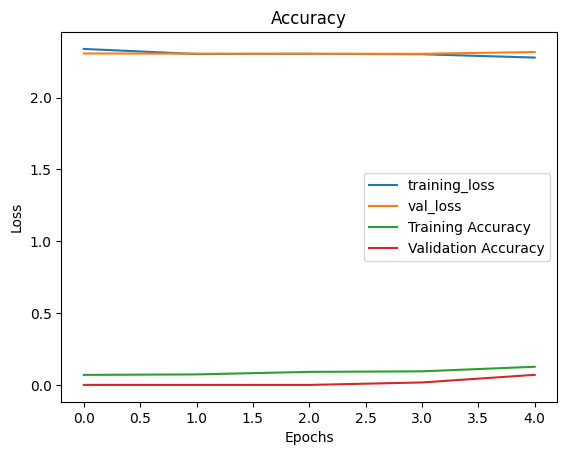

In [ ]:
#Check out the model'loss curves on the 10 classes
plot_loss_curves(history_9)

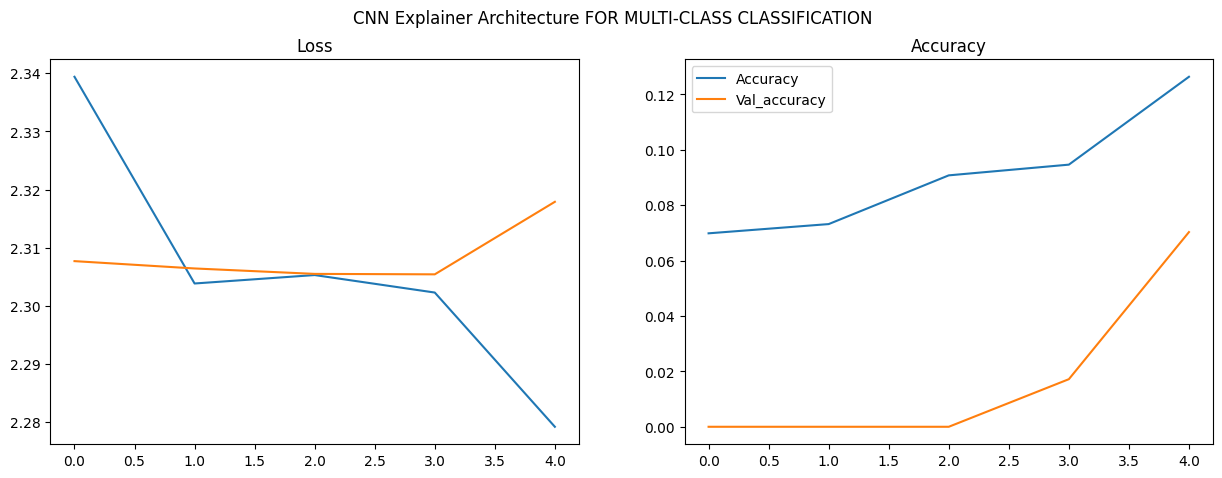

In [ ]:
curves_plot(history_9,"CNN Explainer Architecture FOR MULTI-CLASS CLASSIFICATION")

What do these loss tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words,its getting great results on the training data but fails too to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjusting different hyperparameters and improve the model(try to beat the baseline/reduce overfitting)

Due to its performance on the training data,its clear our model is learning something...

However, it's not generalising well to unseen data (overfitting).

So,lets try and fix overfitting by...

* **Get More Data** - Having more data gives model more opportunity to learn diverse patterns ...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model. one way to simplify a model is to: reduce number of laayers or reduce number of hidden layers.
* **Use Data Augmentation**: Increase the diversity of your training data by not increasing number of images.Increase diversity forces a model to learn more generalisation patterns.
* **Use transfer learning**: Transfer learning leverages the patterns another model has learned on previous training task.
(e.g. We have trained a CNN model to classifiy the images of cats and dogs. Then this model is used for the classification of clothing items based on size like small items and big items)

> EXPERIMENT EXPERIMENT EXPERIMENT

In [ ]:
#How about we try to simplify the model
#Lets try to remove 2 Convolutional layers...
model_10=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#Compile the model
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

#Fit the model
history_10=model_10.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 262s 1s/step - loss: 2.4363 - accuracy: 0.1032 - val_loss: 2.3004 - val_accuracy: 0.1320
Epoch 2/5
235/235 [==============================] - 299s 1s/step - loss: 2.2833 - accuracy: 0.1531 - val_loss: 2.2604 - val_accuracy: 0.1596
Epoch 3/5
235/235 [==============================] - 254s 1s/step - loss: 2.1781 - accuracy: 0.2295 - val_loss: 2.2395 - val_accuracy: 0.1720
Epoch 4/5
235/235 [==============================] - 272s 1s/step - loss: 1.8850 - accuracy: 0.3627 - val_loss: 2.3166 - val_accuracy: 0.1752
Epoch 5/5
235/235 [==============================] - 262s 1s/step - loss: 1.5080 - accuracy: 0.4913 - val_loss: 2.4490 - val_accuracy: 0.1800


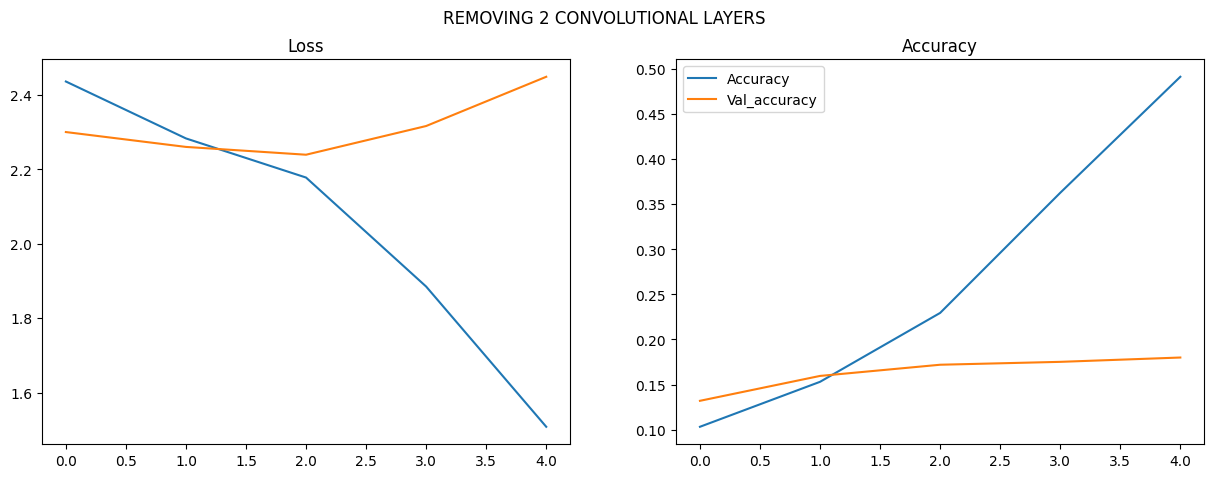

In [ ]:
#check our the loss curvees of model_10
curves_plot(history_10,'REMOVING 2 CONVOLUTIONAL LAYERS')

> 🔑**Notes:** Take this into consideration that not every change in the model will lead to increase the performance of the model.

Looks like our "simplifying the model" Experiment didn't work...
The necessary went the down and overfitting continued...

How About we try Data Augmentation?

### Trying to reduce Overfitting with data augmentation

Lets try and improve our models results by using augmented training data...

Ideally, we want to:
*  Reduce overfitting (get the train and validation loss curves closer)
* Improve Validation accuracy

In [ ]:
#Create an augmented data generator instances
train_datagen_augmented=ImageDataGenerator(rescale=1/255,
                                           zoom_range=0.2,
                                           shear_range=0.2,
                                           rotation_range=0.2,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           horizontal_flip=True)
test_datagen_augmented=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='categorical',
                                                                 shuffle=False)
test_data_augmented=test_datagen_augmented.flow_from_directory(test_dir,
                                                               target_size=(224,224),
                                                               batch_size=32,
                                                               class_mode='categorical',
                                                               shuffle=False)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Lets create another model but this time we'll fit it on thn augmented training data of 10 classes
model_11=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#Compile the model
model_11.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

#Fit the model
history_11=model_11.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented), # Steps_per_epoch means the number of batches created which is equal to number of iterations performed by the model
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 550s 2s/step - loss: 2.3398 - accuracy: 0.0831 - val_loss: 2.3026 - val_accuracy: 0.1048
Epoch 2/5
235/235 [==============================] - 543s 2s/step - loss: 2.3041 - accuracy: 0.0884 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 543s 2s/step - loss: 2.3039 - accuracy: 0.0648 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 4/5
235/235 [==============================] - 547s 2s/step - loss: 2.3043 - accuracy: 0.0817 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 545s 2s/step - loss: 2.3039 - accuracy: 0.0483 - val_loss: 2.3026 - val_accuracy: 0.1016


#### Cloning of Model

Cloning a model is similar to calling a model on new inputs except that it creates new layers.

In [ ]:
#Lets clon the model
model_12=tf.keras.models.clone_model(model_9)

#Compile the model (using the same setup as previous models)
model_12.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

#Fit the model
history_12=model_12.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
model_12.evaluate(test_data)

In [ ]:
#Check out our model trained on augmented data's loss curves
plot_loss_curves(history_12)

In [ ]:
curves_plot(history_12,'Data Augmentation on clone model(model_9)')

Woah, That looks much better the loss,curves are much closer than the baseline model and they look like they're heading in the right direction(certainly not the wrong direction) so if we were to train for longer,we might see further improvements.

### 7. Repeat Untill Satisfied

Things we can do are:
* **Shuffle** the augmented data so that to make model learns better as we want now to predict model that any class of image randomly.Not like one class after another.
* **Epochs:** Sometimes ,while training the data for longer epochs may increase the val_accu and train_accu.
* Restructuring model architecture (increasing layers/hidden units)
* Adjust the learning rate
* try different methods of data augmentation(adjust the hyperparameter of ImageDataGenerator)
* try **Transfer learning**

In [ ]:
#Restructuting model architecture (model_12)
# Adding 2 conv layers
model_13=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax') #for multi-class classification
]
)

#Compile the model
model_13.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

#Fit the model
history_13=model_13.fit(train_data,
             epochs=5,
             steps_per_epochs=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

In [ ]:
#curves Plot
curves_plot(history_13,'ReStructuring of CNN Explainer model')

In [ ]:
#Changing the learning rate
#Model14
model_14=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)).
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#Compile the model
model_14.compile(loss='categorical_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

#fit the model
model_14.fit(train_data,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data),
             epochs=5)

In [ ]:
#Adjust the hyperparameters of Image DataGenerator
train_datagen_tune=ImageDataGenerator(rescale=1/255,
                                      horizontal_flip=True, #True or False
                                      zoom_range=0.2, #0.2,0,-0.2,0.3,0.4,-0.3,-0.4
                                      shear_range=0.2, #Shear range is like tilting or slanting a image in particular direction
                                      rotation_range=40, #40,30,20,10,0,-10,-20,-30,-40
                                      height_shift_range=0.2,
                                      width_shift_range=0.2,
                                      fill_mode='nearest') #constant,relfect,wrap
                                      #We use fill mode when we want variability in image appearance

#### Random Search - Hyperparameter Optimization

In [ ]:
#Parameters with values
param_dist={
    'rotation_range':[10,20,30,40],
    'width_shift_range':[0.1,0.2,0.3],
    'height_shift_range':[0.1,0.2,0.3],
    'fill_mode':['nearest','constant','wrap','reflect'],
    'shear_range':[0.1,0.2,0.3],
    'zoom_range':[0.1,0.2,0.3],
    'horizontal_flip':[True,False]
}

#Use `kerasClassifier` from `keras.wrappers.scikit_learn`
#By doing this it allows keras models to be used with scikit learns `RandomizedSearchCV`
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

#Wrap keras model
model_wrap=KerasClassifier(build_fn=model_13,epochs=5,batch_size=32,verbose=0)

#Performed Randomized Search
random_search=RandomizedSearchCV(estimator=model_wrap,
                                 param_distributions=param_dist,
                                 cv=3,
                                 n_iter=10,
                                 verbose=2)
random_search.fit(train_datagen.flow(train_data),epochs=5,validation_data=test_datagen.flow(test_data))

print("Best: %f using %s"%(random_search.best_score_,random_search.best_params_))

### Making a Prediction with our trained model

Lets use our trained model to make some predictions on our own custom images!😃

In [ ]:
#Remind ourselves of the classes our model
class_names

In [ ]:
#Custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

In [ ]:
#Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename,makes a prediction with model
  and plots the image with the predicted class as the title
  """
  #Import the target image and preprocess it
  img=load_and_prep_image(filename)

  #Make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))

  #Add in logic for multi-class
  if len(pred[0]>1):
    pred_class=class_names[tf.argmax(pred[0])]
  else:
    pred_class=class_names[int(tf.round(pred[0]))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis('off')

In [ ]:
#Make a prediction using the model_14
pred_and_plot(model=model_14,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

Looks like our model did not perform very well on our custom images but this bcoz it only achieved ~30% accuracy on the test data.
So we can expect it to function quite very poorly on other unseen data.

## Saving and loading our model

In [ ]:
#Save a model
model_14.save('saved_model_10')

In [ ]:
#Load in a trained model and evaluate it
loaded_model_10=tf.keras.models.load('saved_model_10')
loaded_model_10.evaluate(test_data)

In [ ]:
#Compare our loaded model to our existing model
model_14.evaluate(test_data)